Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [26]:
NAME = "Sunil Rai"

## Assignment 1 - Data Cleaning & Visualization
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'bran' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

**Question 1.** Create a new 'Type of Cereal' column in your dataframe by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

A new column Type of Cereal is created by copying the name column. A function called idenfitytype is created to identify the type of cereal and replace the values present in the copied column with the categories provided.

In [27]:
import pandas as pd
import math as math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3D

In [28]:
cereal_df = pd.read_csv('cereal.csv')
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [29]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [30]:
cereal_df['Type of Cereal'] = cereal_df['name']
cereal_df[['name', 'Type of Cereal']].head()

,name,Type of Cereal
0,100% Bran,100% Bran
1,100% Natural Bran,100% Natural Bran
2,All-Bran,All-Bran
3,All-Bran with Extra Fiber,All-Bran with Extra Fiber
4,Almond Delight,Almond Delight


In [31]:
def idenfitytype(typeofcereal):
    cerealtype = ['Bran', 'Wheat', 'Fiber', 'Protein', 'Crunch', 'Corn', 'Nut', 'Rice']
    for ctype in cerealtype:
        if(ctype.lower() in typeofcereal.lower()):
            return ctype
    return "Other"


In [32]:
cereal_df['Type of Cereal'] = cereal_df['Type of Cereal'].apply(idenfitytype)
cereal_df[['name', 'Type of Cereal']].head(5)

,name,Type of Cereal
0,100% Bran,Bran
1,100% Natural Bran,Bran
2,All-Bran,Bran
3,All-Bran with Extra Fiber,Bran
4,Almond Delight,Other


**Questions 2.** Identify the negative values in the data set and replace them with the median value for that column

The negatives values in all the integer columns are checked. If there are any negative value on those integer columns then it is replaced with the median value of the same column.

In [33]:
intcolumns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating']
cereal_df.loc[(cereal_df[intcolumns]<0).any(axis = 1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Other
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816,Wheat
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392,Other


In [34]:
for column in intcolumns:
    if(len(cereal_df[cereal_df[column] < 0]) > 0):
        medianvalue = np.median(cereal_df[column])
        cereal_df[column] = np.where(cereal_df[column] < 0, medianvalue, cereal_df[column])
cereal_df.loc[(cereal_df[intcolumns]<0).any(axis = 1)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal


**Question 3.** Standardize the 'weight' column to 1. 

The nutritional information provided are divided by the weight to standardize the 'weight' column to 1 and then it is stored in the same dataframe.

In [35]:
nutritionalcolumns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
for column in nutritionalcolumns:
    cereal_df[column] = cereal_df[column]/cereal_df['weight']
cereal_df['weight'] = 1.0
cereal_df.head(10)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal
0,100% Bran,N,C,70.000000,4.000000,1.000000,130.000000,10.000000,5.000000,6.000000,280.00000,25.000000,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.00000,0.000000,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70.000000,4.000000,1.000000,260.000000,9.000000,7.000000,5.000000,320.00000,25.000000,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50.000000,4.000000,0.000000,140.000000,14.000000,8.000000,0.000000,330.00000,25.000000,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110.000000,2.000000,2.000000,200.000000,1.000000,14.000000,8.000000,90.00000,25.000000,3,1.0,0.75,34.384843,Other
5,Apple Cinnamon Cheerios,G,C,110.000000,2.000000,2.000000,180.000000,1.500000,10.500000,10.000000,70.00000,25.000000,1,1.0,0.75,29.509541,Other
6,Apple Jacks,K,C,110.000000,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,30.00000,25.000000,2,1.0,1.00,33.174094,Other
7,Basic 4,G,C,97.744361,2.255639,1.503759,157.894737,1.503759,13.533835,6.015038,75.18797,18.796992,3,1.0,0.75,37.038562,Other
8,Bran Chex,R,C,90.000000,2.000000,1.000000,200.000000,4.000000,15.000000,6.000000,125.00000,25.000000,1,1.0,0.67,49.120253,Bran
9,Bran Flakes,P,C,90.000000,3.000000,0.000000,210.000000,5.000000,13.000000,5.000000,190.00000,25.000000,3,1.0,0.67,53.313813,Bran


**Question 4.** Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'.

A function called ishealthycereals is created to find out if the provided cereal is healthy. Then if the conditions of healthy cereal is met then the respective cereal's Healthy column is set as True otherwise it's set as false.

In [36]:
def ishealthycereals(cerealdf):
    if(cerealdf['calories'] < 100 and cerealdf['sodium'] < 150 and
       cerealdf['sugars'] < 9 and cerealdf['fiber'] > 3 and cerealdf['protein'] > 2):
        return True
    return False

In [37]:
cereal_df['Healthy'] = cereal_df.apply(ishealthycereals, axis = 1)

In [38]:
cereal_df[['name', 'calories', 'sodium', 'sugars', 'fiber', 'protein', 'Healthy']].head(10)

,name,calories,sodium,sugars,fiber,protein,Healthy
0,100% Bran,70.000000,130.000000,6.000000,10.000000,4.000000,True
1,100% Natural Bran,120.000000,15.000000,8.000000,2.000000,3.000000,False
2,All-Bran,70.000000,260.000000,5.000000,9.000000,4.000000,False
3,All-Bran with Extra Fiber,50.000000,140.000000,0.000000,14.000000,4.000000,True
4,Almond Delight,110.000000,200.000000,8.000000,1.000000,2.000000,False
5,Apple Cinnamon Cheerios,110.000000,180.000000,10.000000,1.500000,2.000000,False
6,Apple Jacks,110.000000,125.000000,14.000000,1.000000,2.000000,False
7,Basic 4,97.744361,157.894737,6.015038,1.503759,2.255639,False
8,Bran Chex,90.000000,200.000000,6.000000,4.000000,2.000000,False
9,Bran Flakes,90.000000,210.000000,5.000000,5.000000,3.000000,False


In [39]:
print(f"Value counts of the 'Healthy' column : \n {cereal_df['Healthy'].value_counts()}")

Value counts of the 'Healthy' column : 
 Healthy
False    72
True      5
Name: count, dtype: int64


**Question 5.** Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

Using the Healthy column, the healthy cereals are identified per manufacturer and it's total percentage is calculated for each manufacuturer.

In [40]:
manufacturers = cereal_df['mfr'].unique()
manufacturers

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [41]:
cereal_df[cereal_df['Healthy'] == True]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Type of Cereal,Healthy
0,100% Bran,N,C,70.000000,4.000000,1.0,130.0,10.000000,5.000000,6.0,280.000000,25.0,3,1.0,0.33,68.402973,Bran,True
3,All-Bran with Extra Fiber,K,C,50.000000,4.000000,0.0,140.0,14.000000,8.000000,0.0,330.000000,25.0,3,1.0,0.50,93.704912,Bran,True
27,Fruit & Fibre Dates; Walnuts; and Oats,P,C,96.000000,2.400000,1.6,128.0,4.000000,9.600000,8.0,160.000000,20.0,3,1.0,0.67,40.917047,Nut,True
63,Shredded Wheat,N,C,96.385542,2.409639,0.0,0.0,3.614458,19.277108,0.0,114.457831,0.0,1,1.0,1.00,68.235885,Wheat,True
64,Shredded Wheat 'n'Bran,N,C,90.000000,3.000000,0.0,0.0,4.000000,19.000000,0.0,140.000000,0.0,1,1.0,0.67,74.472949,Bran,True


In [42]:
for manufacturer in manufacturers:
    totalcereal = len(cereal_df[cereal_df['mfr'] == manufacturer])
    healthycereal = len(cereal_df[(cereal_df['mfr'] == manufacturer) & (cereal_df['Healthy'] == True)])
    print(f'Manufacturer : {manufacturer}, Total cereals produced : {totalcereal} and Healthy cereals produced : {healthycereal}')
    print(f'Healthy cereals percentage : {healthycereal/totalcereal * 100} %')
    print('-----------------------------------------------------')

Manufacturer : N, Total cereals produced : 6 and Healthy cereals produced : 3
Healthy cereals percentage : 50.0 %
-----------------------------------------------------
Manufacturer : Q, Total cereals produced : 8 and Healthy cereals produced : 0
Healthy cereals percentage : 0.0 %
-----------------------------------------------------
Manufacturer : K, Total cereals produced : 23 and Healthy cereals produced : 1
Healthy cereals percentage : 4.3478260869565215 %
-----------------------------------------------------
Manufacturer : R, Total cereals produced : 8 and Healthy cereals produced : 0
Healthy cereals percentage : 0.0 %
-----------------------------------------------------
Manufacturer : G, Total cereals produced : 22 and Healthy cereals produced : 0
Healthy cereals percentage : 0.0 %
-----------------------------------------------------
Manufacturer : P, Total cereals produced : 9 and Healthy cereals produced : 1
Healthy cereals percentage : 11.11111111111111 %
--------------------

**Question 6.** Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

The average, minimum and maximum ratings for healthy and unhealthy cereals are calculated using the Healthy and rating column of the cereals.

In [43]:
healthyrating = cereal_df[cereal_df['Healthy'] == True]['rating']
unhealthyrating = cereal_df[cereal_df['Healthy'] == False]['rating']

In [44]:
avghealthyrating = np.average(healthyrating)
minhealthyrating = np.min(healthyrating)
maxhealthyrating = np.max(healthyrating)
print(f'The average, minimum, maximum rating for healthy cereals are {avghealthyrating}, {minhealthyrating} and {maxhealthyrating}.') 

The average, minimum, maximum rating for healthy cereals are 69.14675319999999, 40.917047 and 93.704912.


In [45]:
avghealthyrating = np.average(unhealthyrating)
minhealthyrating = np.min(unhealthyrating)
maxhealthyrating = np.max(unhealthyrating)
print(f'The average, minimum, maximum rating for unhealthy cereals are {avghealthyrating}, {minhealthyrating} and {maxhealthyrating}.') 

The average, minimum, maximum rating for unhealthy cereals are 40.82674330555556, 18.042851 and 72.801787.


**Question 7.** Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

The average, minimum and maximum ratings for each type of cereal is calculated using the Type of Cereal and Healthy column.

In [46]:
branrating = cereal_df[cereal_df['Type of Cereal'] == 'Bran']['rating']
wheatrating = cereal_df[cereal_df['Type of Cereal'] == 'Wheat']['rating']
crunchrating = cereal_df[cereal_df['Type of Cereal'] == 'Crunch']['rating']
cornrating = cereal_df[cereal_df['Type of Cereal'] == 'Corn']['rating']
nutrating = cereal_df[cereal_df['Type of Cereal'] == 'Nut']['rating']
ricerating = cereal_df[cereal_df['Type of Cereal'] == 'Rice']['rating']
otherrating = cereal_df[cereal_df['Type of Cereal'] == 'Other']['rating']

avgbranrating = np.average(branrating)
minbranrating = np.min(branrating)
maxbranrating = np.max(branrating)
print(f'The average, minimum, maximum rating for barn are {avgbranrating}, {minbranrating} and {maxbranrating}.') 

avgwheatrating = np.average(wheatrating)
minwheatrating = np.min(wheatrating)
maxwheatrating = np.max(wheatrating)
print(f'The average, minimum, maximum rating for wheat are {avgwheatrating}, {minwheatrating} and {maxwheatrating}.') 

avgcrunchrating = np.average(crunchrating)
mincrunchrating = np.min(crunchrating)
maxcrunchrating = np.max(crunchrating)
print(f'The average, minimum, maximum rating for crunch are {avgcrunchrating}, {mincrunchrating} and {maxcrunchrating}.') 

avgcornrating = np.average(cornrating)
mincornrating = np.min(cornrating)
maxcornrating = np.max(cornrating)
print(f'The average, minimum, maximum rating for corn are {avgcornrating}, {mincornrating} and {maxcornrating}.') 

avgnutrating = np.average(nutrating)
minnutrating = np.min(nutrating)
maxnutrating = np.max(nutrating)
print(f'The average, minimum, maximum rating for nut are {avgnutrating}, {minnutrating} and {maxnutrating}.') 

avgricerating = np.average(ricerating)
minricerating = np.min(ricerating)
maxricerating = np.max(ricerating)
print(f'The average, minimum, maximum rating for rice are {avgricerating}, {minricerating} and {maxricerating}.') 

avgotherrating = np.average(otherrating)
minotherrating = np.min(otherrating)
maxotherrating = np.max(otherrating)
print(f'The average, minimum, maximum rating for other are {avgotherrating}, {minotherrating} and {maxotherrating}.') 


The average, minimum, maximum rating for barn are 50.71417876923077, 28.592785 and 93.704912.
The average, minimum, maximum rating for wheat are 56.33386336363637, 36.176196 and 72.801787.
The average, minimum, maximum rating for crunch are 26.078598, 18.042851 and 36.523683.
The average, minimum, maximum rating for corn are 40.48272, 35.782791 and 45.863324.
The average, minimum, maximum rating for nut are 42.433499999999995, 31.072217 and 53.371007.
The average, minimum, maximum rating for rice are 47.77173466666667, 40.560159 and 60.756112.
The average, minimum, maximum rating for other are 37.281694083333335, 21.871292 and 55.333142.


**Question 8.** Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

A stacked bar chart is created by grouping the dataframe using mfr and Type of Cereal.

In [47]:
mfrtypeofcereal = cereal_df.groupby(['mfr', 'Type of Cereal']).size().unstack()

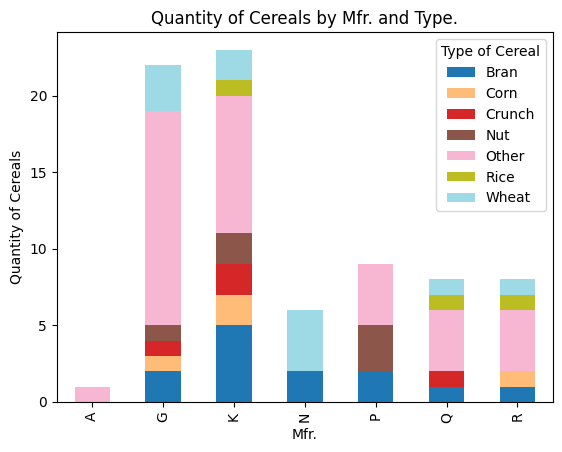

In [48]:
mfrtypeofcereal.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('Mfr.')
plt.ylabel('Quantity of Cereals')
plt.title('Quantity of Cereals by Mfr. and Type.')
plt.show()

**Question 9.** Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

A 3D scatterplot is created using matplotlib to show the relationship between rating and calories. The healthy cereal is shown as green dot whereas an unhealthy cereal is shown as red dot.

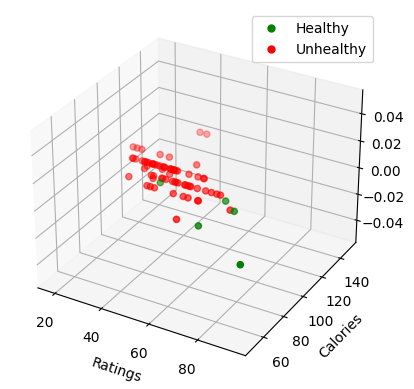

In [49]:
colors = {True: 'green', False: 'red'}

fig = plt.figure()

scatterplot = fig.add_subplot(111, projection = '3d')
scatterplot.scatter(cereal_df['rating'], cereal_df['calories'], 0, c = cereal_df['Healthy'].map(colors), s = 20)
scatterplot.set_xlabel('Ratings')
scatterplot.set_ylabel('Calories')

legend_elements = [
    Line3D([0], [0], [0], marker='o', color='green', label='Healthy', markersize=5, linestyle='None'),
    Line3D([0], [0], [0], marker='o', color='red', label='Unhealthy', markersize=5, linestyle='None')
]
scatterplot.legend(handles = legend_elements)

plt.show()

**Question 10.** Which shelf has the most healthy cereals?

The shelf with most healthy cereals is found out by grouping the dataframe by shelf and Healthy columns.

In [50]:
groupedcerealbyshelf = cereal_df.groupby(['shelf', 'Healthy'])
print(groupedcerealbyshelf.size())
print('The shelf with most healthy cereals is 3.')

shelf  Healthy
1      False      18
       True        2
2      False      21
3      False      33
       True        3
dtype: int64
The shelf with most healthy cereals is 3.


**Question 11.** Based on the analysis conducted, what can you conclude about the cereal data set?

Based on the analysis of the data, we can find that 4 out of 7 manufacturers produces unhealthy cereals. Out of 77 cereals only 5 of them are healthy, which is 6.49 % of the total. Almost all of the cereals produced are unhealthy which is not good for human health. Two manufacturers K and G produce 58.44% of the cereals. Manufacturer K produce highest number of cereals i.e. 23 whereas Manufacturer A produce least number of cereals i.e. 1.